In [6]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import cv2

In [7]:
validation_set = tf.keras.utils.image_dataset_from_directory(
     r"C:\Users\Aqib\plant_disease\Plant_Diseases_Dataset\valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 45962 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

In [8]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')


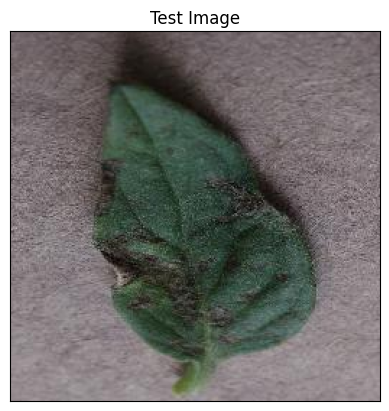

In [25]:
#Test Image Visualization

image_path = r"C:\Users\Aqib\plant_disease\Plant_Diseases_Dataset\test\TomatoEarlyBlight6.JPG"
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [26]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 18ms/step


In [22]:
print(predictions)

[[9.7803557e-01 8.4672311e-06 1.4383273e-05 3.5837846e-04 1.2669603e-06
  6.1382261e-06 3.4110071e-06 6.5233739e-06 8.2754224e-07 4.8519109e-05
  9.7125148e-06 3.3023696e-07 4.7873034e-08 1.0599781e-06 8.6218029e-07
  7.5356457e-03 1.3507126e-02 3.8099611e-07 1.5193096e-05 9.7739205e-05
  9.5575012e-07 9.4458874e-06 1.6538358e-04 1.6031979e-07 1.0689407e-06
  2.7666163e-05 5.8317091e-06 1.7780808e-06 4.4115979e-05 5.7094785e-05
  2.7825457e-05 2.4882149e-06 2.9383864e-06 8.1446260e-08 2.9677793e-08
  2.4957802e-07 8.9258592e-09 1.3829336e-06]]


In [29]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

29


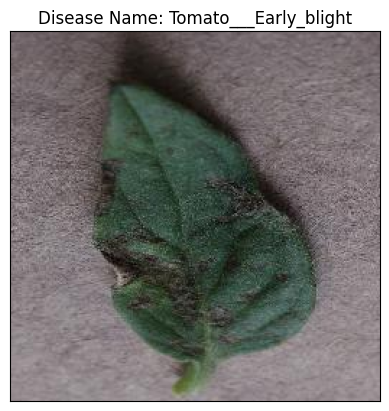

In [31]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

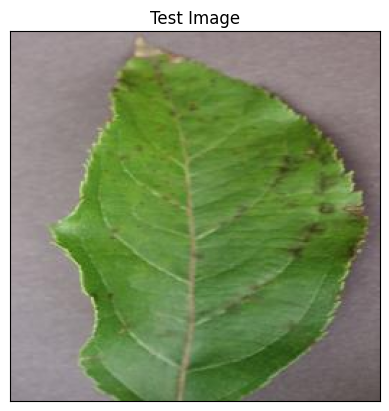

In [ ]:
#Test Image Visualization

image_path = r"C:\Users\Aqib\plant_disease\Plant_Diseases_Dataset\test\AppleScab1.JPG"
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()